# Data Overview


In [41]:
import pandas as pd

# Load the datasets
rental_price_data = pd.read_csv('../data/rental_price.csv')
rating_features_data = pd.read_csv('../data/rating_features.csv')

print(rental_price_data.head())
print(rating_features_data.head())

print(rental_price_data.describe())
print(rating_features_data.describe())

     price
0  $300.00
1   $99.00
2  $100.00
3  $100.00
4  $599.00
   accommodates                                          amenities  \
0             6  {"Cable TV",Internet,"Wireless Internet","Air ...   
1             2  {"Air Conditioning",Heating,"Family/Kid Friend...   
2             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4             6  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   availability_30  bathrooms  bed_type  bedrooms  beds  \
0                0        2.5  Real Bed       1.0   3.0   
1               29        0.0     Futon       1.0   1.0   
2               30        1.5  Real Bed       1.0   1.0   
3               30        1.5  Real Bed       1.0   1.0   
4               27        2.0  Real Bed       3.0   3.0   

   calculated_host_listings_count cancellation_policy  guests_included  \
0                               1            moderate                1   
1         

# Preprocessing

- we only look at key ameniteis based on their frequency in the data set and perosonal obsrvation on most important amenities.

### Missing Values
- for missing values bathrooms, beds, review_scores_checkin, review_scores_communication, review_scores_location,
review_scores_rating, review_scores_value mean was assesed. 
- for is host_is_superhost flase is assumed
- for host_listings_count 1 is assuemed. Therefor it is assumed that the host only has one listing.

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
rental_price_data = pd.read_csv('../data/rental_price.csv')
rating_features_data = pd.read_csv('../data/rating_features.csv')

# Function to extract key amenities directly from the amenities string
def extract_key_amenities_directly(amenities):
    key_amenities = ['Internet', 'Wireless Internet', 'Kitchen', 'Heating', 'Essentials', 'TV',
                     'Washer', 'Dryer', 'Free parking on premises', 'Air conditioning', 'Breakfast',
                     'Pets allowed', 'Family/kid friendly', 'Suitable for events']
    # Normalize the amenities string for consistent matching
    amenities = amenities.lower().replace('"', '').replace('{', '').replace('}', '').replace(' ', '')
    features = {amenity: 1 if amenity.lower().replace(' ', '') in amenities else 0 for amenity in key_amenities}
    return pd.Series(features)

# Apply the function to extract key amenities and add them as new columns
key_amenities_df = rating_features_data['amenities'].apply(extract_key_amenities_directly)
rating_features_data = pd.concat([rating_features_data, key_amenities_df], axis=1)

# Optionally drop the original 'amenities' column if no longer needed
rating_features_data.drop('amenities', axis=1, inplace=True)

# Convert price from string to float
rental_price_data['price'] = rental_price_data['price'].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
print("Before Preproccessing")
print("Missing values in rental data:", rental_price_data.isnull().sum())
print("Missing values in rating features data:", rating_features_data.isnull().sum())

# Fill missing values in 'host_is_superhost' with False
rating_features_data['host_is_superhost'].fillna('f', inplace=True)

# Fill missing values in 'host_listings_count' with 1
rating_features_data['host_listings_count'].fillna(1, inplace=True)


# Fill missing values for numerical columns with the median
for column in rating_features_data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = rating_features_data[column].median()
    rating_features_data[column].fillna(median_value, inplace=True)
    
#Scale Nummerical Values with MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = rating_features_data.select_dtypes(include=['float64', 'int64']).columns
rating_features_data[numerical_columns] = scaler.fit_transform(rating_features_data[numerical_columns])

# Has availabiltiy is allways true. Therefor it can be droped
rating_features_data.drop('has_availability',axis=1, inplace=True)

#Replace t and f with True and False
mapping = {'f': 0, 't': 1}
rating_features_data['host_is_superhost'] = rating_features_data['host_is_superhost'].map(mapping)
rating_features_data['instant_bookable'] = rating_features_data['instant_bookable'].map(mapping)

# Encode categorical variables using one-hot encoding
categorical_columns = ['room_type', 'bed_type', 'property_type', 'cancellation_policy']
rating_features_data = pd.get_dummies(rating_features_data, columns=categorical_columns)

#Convert all Data to numerical data
rating_features_data = rating_features_data.astype(float)

pd.set_option('display.max_columns', None)

# Convert to DataFrame and use to_string to display all columns
rental_missing = rental_price_data.isnull().sum().reset_index()
rating_missing = rating_features_data.isnull().sum().reset_index()

# Print to check if there are still missing values
print("\nMissing values in rental data:\n", rental_missing.to_string(index=False, header=['Column', 'Missing Values']))
print("Missing values in rating features data:\n", rating_missing.to_string(index=False, header=['Column', 'Missing Values']))

#Overview of all Data in the dataset
print(rental_price_data.describe())
print(rating_features_data.describe())


Before Preproccessing
Missing values in rental data: price    0
dtype: int64
Missing values in rating features data: accommodates                         0
availability_30                      0
bathrooms                           46
bed_type                             0
bedrooms                             6
beds                                23
calculated_host_listings_count       0
cancellation_policy                  0
guests_included                      0
has_availability                     0
host_is_superhost                   15
host_listings_count                 15
instant_bookable                     0
latitude(North)                      0
longitude(East)                      0
maximum_nights                       0
number_of_reviews                    0
property_type                        0
review_scores_checkin             2057
review_scores_communication       2057
review_scores_location            2056
review_scores_rating              2046
review_scores_value      

# Correlation Analysis

- Analysis what coloumns have an high impact on rent price.
- Variance Explination Calculation
- Correlation Matrix between the rating features

Correlation with rental price:
price                           1.000000
bathrooms                       0.593402
bedrooms                        0.541312
accommodates                    0.476106
beds                            0.456466
                                  ...   
host_is_superhost              -0.088021
cancellation_policy_moderate   -0.088424
property_type_Apartment        -0.136604
number_of_reviews              -0.136879
room_type_Private room         -0.276204
Name: price, Length: 65, dtype: float64


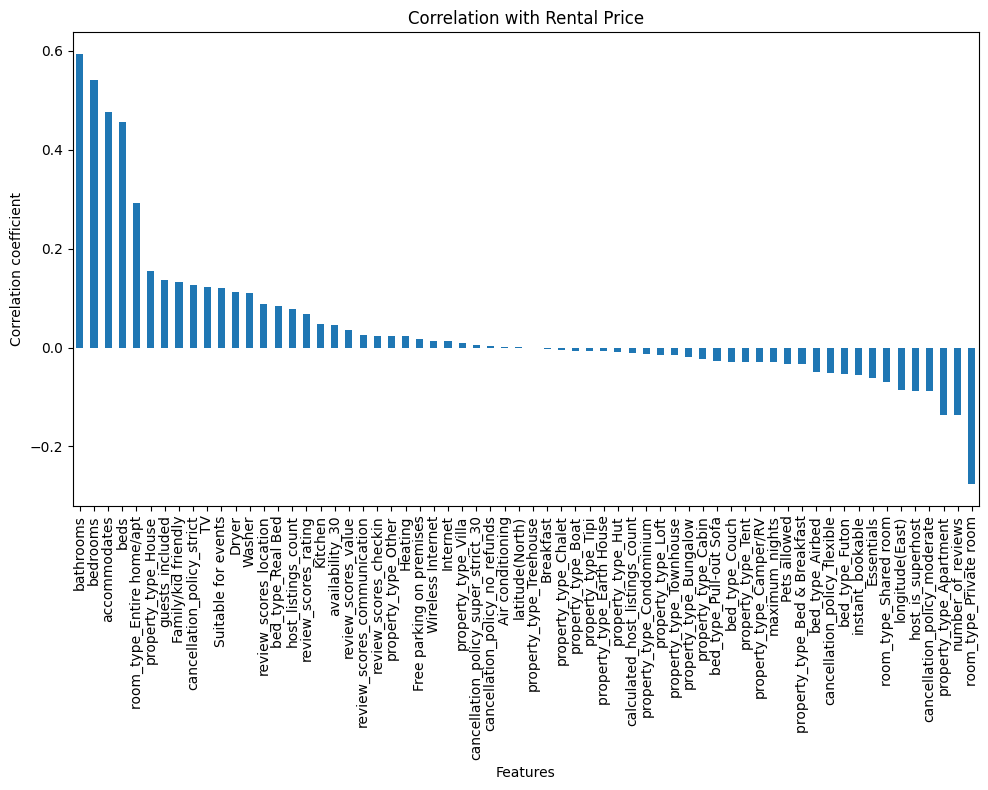

Variance explained by the model: 0.4165164771096329
Feature importance based on model coefficients:
cancellation_policy_super_strict_30    3.079177e+15
cancellation_policy_no_refunds         3.079177e+15
cancellation_policy_strict             3.079177e+15
cancellation_policy_flexible           3.079177e+15
cancellation_policy_moderate           3.079177e+15
                                           ...     
bed_type_Futon                        -3.725092e+14
bed_type_Airbed                       -3.725092e+14
room_type_Entire home/apt             -4.077587e+15
room_type_Private room                -4.077587e+15
room_type_Shared room                 -4.077587e+15
Length: 64, dtype: float64


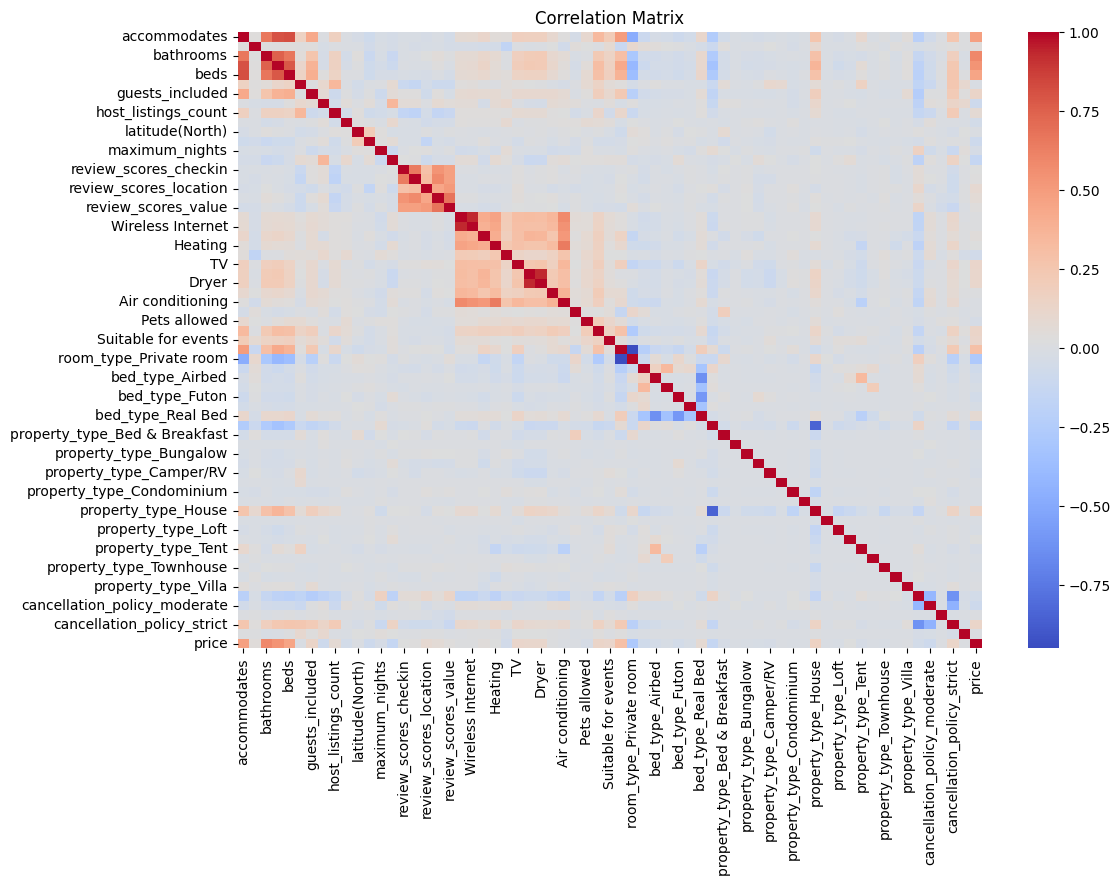

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Merge the datasets based on a common key
merged_df = pd.concat([rating_features_data, rental_price_data], axis=1)

# Calculate the correlation
correlation_matrix = merged_df.corr()
rental_price_correlation = correlation_matrix['price'].sort_values(ascending=False)
pd.set_option('display.max_columns', None)
print("Correlation with rental price:")
print(rental_price_correlation)
plt.figure(figsize=(10, 8))
rental_price_correlation.drop('price').plot(kind='bar')
plt.title('Correlation with Rental Price')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze variance explained by each feature
X = merged_df.drop(columns='price')  # Drop rental price
y = merged_df['price']

model = LinearRegression()
model.fit(X, y)

# Variance explained by the model
variance_explained = model.score(X, y)
print(f'Variance explained by the model: {variance_explained}')

# Coefficients of the model
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature importance based on model coefficients:")
print(feature_importance)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature Selection

- Recursive Feature Elimination (RFE): Iteratively removes features and builds a model to determine which feature subset produces the best model performance.
- Forward Selection: Adds features one by one based on model performance.
- Ridge Regression (L2 Regularization): Shrinks coefficients toward zero, but generally does not perform feature selection unless the regularization strength is high.
